In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(palette="deep", style='white')
%matplotlib inline

In [2]:
df_initial_train = pd.read_csv('train.csv')
df_train = df_initial_train.copy()
df_initial_test = pd.read_csv('test.csv')
df_test = df_initial_test.copy()
df_train = pd.concat([df_train, df_test], ignore_index=True, sort=True)

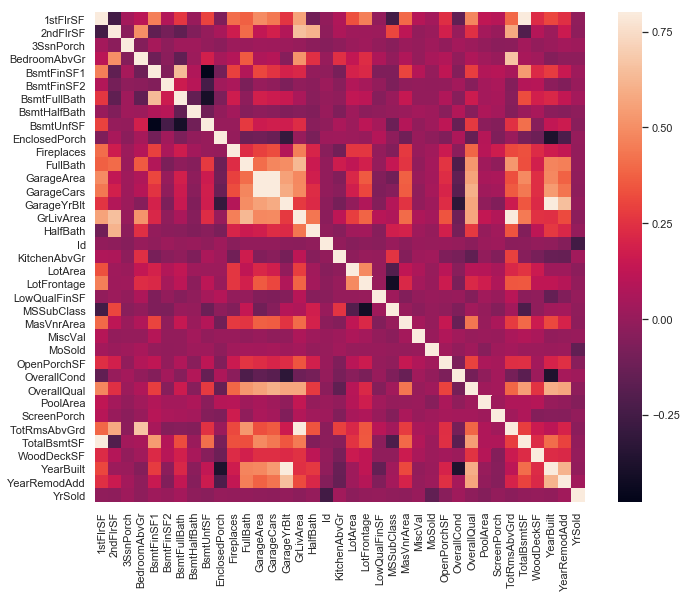

In [3]:
corrmat = df_train.drop('SalePrice', axis=1).corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [4]:
indices = np.where(corrmat.abs() > 0.65)
indices = [(corrmat.index[x], corrmat.columns[y], corrmat.values[x][y])
           for x, y in zip(*indices) if x != y and x < y]
high_corr = pd.DataFrame(indices, columns=['Feature1', 'Feature2', 'Correlation'])
high_corr.sort_values('Correlation')

,Feature1,Feature2,Correlation
5,GarageYrBlt,YearRemodAdd,0.652365
1,2ndFlrSF,GrLivArea,0.655085
2,BedroomAbvGr,TotRmsAbvGrd,0.669737
0,1stFlrSF,TotalBsmtSF,0.801670
6,GrLivArea,TotRmsAbvGrd,0.808354
4,GarageYrBlt,YearBuilt,0.834812
3,GarageArea,GarageCars,0.889700


Text(0.5,0.98,'Count of missing values')

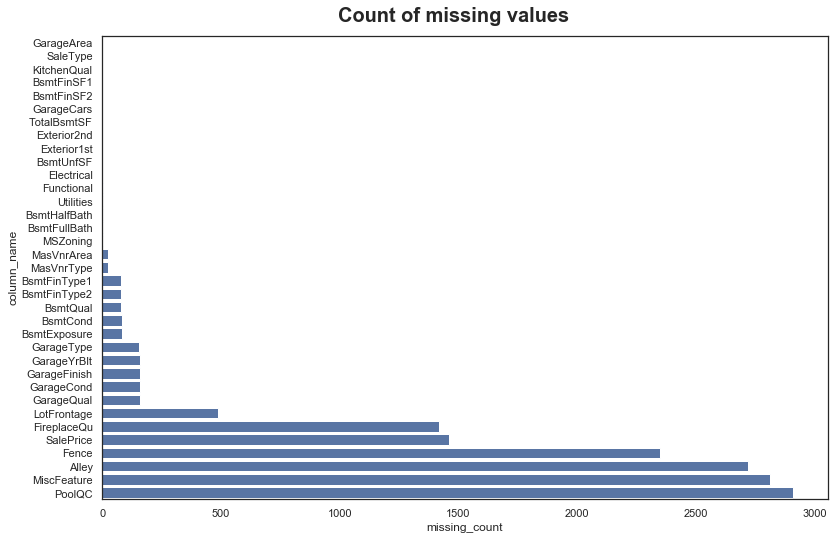

In [5]:
missing_values = df_train.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')
plt.figure(figsize=(13,8))
g = sns.barplot(y='column_name', x='missing_count', data=missing_values, orient='h', color='b')
g.figure.subplots_adjust(top=0.93)
g.figure.suptitle('Count of missing values', fontsize=20, fontweight='bold')

In [6]:
missing_values

,column_name,missing_count
31,GarageArea,1
71,SaleType,1
45,KitchenQual,1
8,BsmtFinSF1,1
9,BsmtFinSF2,1
32,GarageCars,1
75,TotalBsmtSF,1
24,Exterior2nd,1
23,Exterior1st,1
15,BsmtUnfSF,1


**Convert nulls**

In [7]:
# Change Lot Frontage from NA to 0
df_train.loc[:, "LotFrontage"] = df_train.loc[:, "LotFrontage"].fillna(0)
# Change Alley from NA to None
df_train.loc[:, "Alley"] = df_train.loc[:, "Alley"].fillna("None")
# Change Masonry veneer type from NA to None
df_train.loc[:, "MasVnrType"] = df_train.loc[:, "MasVnrType"].fillna("None")
# Change Masonry veneer area from NA to 0
df_train.loc[:, "MasVnrArea"] = df_train.loc[:, "MasVnrArea"].fillna(0)
# Change 333 Basement Finish Type 2 to Unf (same as Type 1)
df_train.loc[332, "BsmtFinType2"] = 'Unf'
# Change Basement Quality from NaN to None
df_train.loc[:, "BsmtQual"] = df_train.loc[:, "BsmtQual"].fillna("None")
# Change Basement Condition from NaN to None
df_train.loc[:, "BsmtCond"] = df_train.loc[:, "BsmtCond"].fillna("None")
# Change Basement Finish Type 1 and 2 from NaN to None
df_train.loc[:, "BsmtFinType1"] = df_train.loc[:, "BsmtFinType1"].fillna(
    "None")
df_train.loc[:, "BsmtFinType2"] = df_train.loc[:, "BsmtFinType2"].fillna(
    "None")
# Change Basement Exposure from NaN to None
df_train.loc[:, "BsmtExposure"] = df_train.loc[:, "BsmtExposure"].fillna(
    "None")
# Change Fireplace Quality from NaN to None
df_train.loc[:, "FireplaceQu"] = df_train.loc[:, "FireplaceQu"].fillna("None")
# Change Garage Type from NaN to None
df_train.loc[:, "GarageType"] = df_train.loc[:, "GarageType"].fillna("None")
# Change Garage Finish from NaN to None
df_train.loc[:, "GarageFinish"] = df_train.loc[:, "GarageFinish"].fillna(
    "None")
# Change Garage Quality from NaN to None
df_train.loc[:, "GarageQual"] = df_train.loc[:, "GarageQual"].fillna("None")
# Change Garage Condition from NaN to None
df_train.loc[:, "GarageCond"] = df_train.loc[:, "GarageCond"].fillna("None")
# Change Pool Quality from NaN to None
df_train.loc[:, "PoolQC"] = df_train.loc[:, "PoolQC"].fillna("None")
# Change Fence from NaN to None
df_train.loc[:, "Fence"] = df_train.loc[:, "Fence"].fillna("None")
# Change Misc Feature from NaN to None
df_train.loc[:, "MiscFeature"] = df_train.loc[:, "MiscFeature"].fillna("None")
# Change Garage Year built to same as Year Built
df_train.loc[:, "GarageYrBlt"] = df_train.loc[:, "GarageYrBlt"].fillna(
    df_train['YearBuilt'])

# Additional required for test data
# Change MSZoning from NaN to RL (most common)
df_train.loc[:, "MSZoning"] = df_train.loc[:, "MSZoning"].fillna("RL")
# Change Utilities from NaN to AllPub (most common)
df_train.loc[:, "Utilities"] = df_train.loc[:, "Utilities"].fillna("AllPub")
# Change basement NaN to 0 as its all for one record
df_train.loc[:, "BsmtFinSF1"] = df_train.loc[:, "BsmtFinSF1"].fillna(0)
df_train.loc[:, "BsmtFinSF2"] = df_train.loc[:, "BsmtFinSF2"].fillna(0)
df_train.loc[:, "BsmtUnfSF"] = df_train.loc[:, "BsmtUnfSF"].fillna(0)
df_train.loc[:, "TotalBsmtSF"] = df_train.loc[:, "TotalBsmtSF"].fillna(0)
df_train.loc[:, "BsmtFullBath"] = df_train.loc[:, "BsmtFullBath"].fillna(0)
df_train.loc[:, "BsmtHalfBath"] = df_train.loc[:, "BsmtHalfBath"].fillna(0)
# Change Siding from NaN to VinylSd as its the most common
df_train.loc[:, "Exterior1st"] = df_train.loc[:, "Exterior1st"].fillna(
    "VinylSd")
df_train.loc[:, "Exterior2nd"] = df_train.loc[:, "Exterior2nd"].fillna(
    "VinylSd")
# Change KitchenQual from NaN to TA as its the most common
df_train.loc[:, "KitchenQual"] = df_train.loc[:, "KitchenQual"].fillna("TA")
# Change Functional from NaN to Typ as its the most common
df_train.loc[:, "Functional"] = df_train.loc[:, "Functional"].fillna("Typ")
# Change Garage from NaN to the mean
df_train.loc[:, "GarageCars"] = df_train.loc[:, "GarageCars"].fillna(
    df_train['GarageCars'].mean())
df_train.loc[:, "GarageArea"] = df_train.loc[:, "GarageArea"].fillna(
    df_train['GarageArea'].mean())
# Change SaleType from NaN to WD as its the most common
df_train.loc[:, "SaleType"] = df_train.loc[:, "SaleType"].fillna("WD")
# change 2550 as its year sold is earlier than year built
df_train.loc[2549, "YearBuilt"] = 2007
df_train.loc[2549, "YearRemodAdd"] = 2007
# change 2296 as its year sold is earlier than remodel
df_train.loc[2295, "YearRemodAdd"] = 2007

**Convert categorical features to strings**

From *A study on Regression applied to the Ames dataset*

In [8]:
df_train = df_train.replace({
    "MSSubClass": {
        20: "SC20",
        30: "SC30",
        40: "SC40",
        45: "SC45",
        50: "SC50",
        60: "SC60",
        70: "SC70",
        75: "SC75",
        80: "SC80",
        85: "SC85",
        90: "SC90",
        120: "SC120",
        150: "SC150",
        160: "SC160",
        180: "SC180",
        190: "SC190"
    },
    "MoSold": {
        1: "Jan",
        2: "Feb",
        3: "Mar",
        4: "Apr",
        5: "May",
        6: "Jun",
        7: "Jul",
        8: "Aug",
        9: "Sep",
        10: "Oct",
        11: "Nov",
        12: "Dec"
    }
})

**Other engineered features**

In [9]:
df_train["TotalHouseBsmtSF"] = df_train["1stFlrSF"] + df_train["2ndFlrSF"] + df_train["TotalBsmtSF"]
df_train["TotalBathrooms"] = df_train["BsmtFullBath"] + (0.5* df_train["BsmtHalfBath"]) + df_train["FullBath"] + (0.5*df_train["HalfBath"])
df_train["TotalHouseRooms"] = df_train["TotalBathrooms"] + df_train["TotRmsAbvGrd"]
df_train["AvgRoomSize"] = df_train["TotalHouseBsmtSF"] / df_train["TotalHouseRooms"] 
df_train["AgeAtSale"] = df_train["YrSold"] - df_train["YearBuilt"]
df_train["YrsAfterRenoSold"] = df_train["YrSold"] - df_train["YearRemodAdd"]
df_train["SFperGarage"] = df_train["TotalHouseBsmtSF"] / (df_train["GarageCars"]+1)

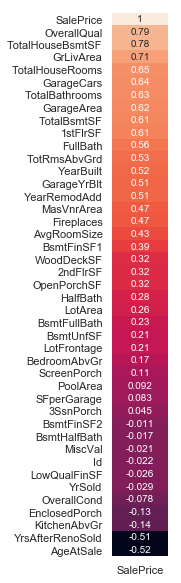

In [10]:
corrmat = df_train.corr()
indices = corrmat.loc[:,'SalePrice'].copy()
a = pd.DataFrame(indices.sort_values(ascending=False))
plt.figure(figsize=(1,10))
sns.heatmap(a, annot=True, cbar=False)

Text(0.5,0.98,'Distribution of SalePrice')

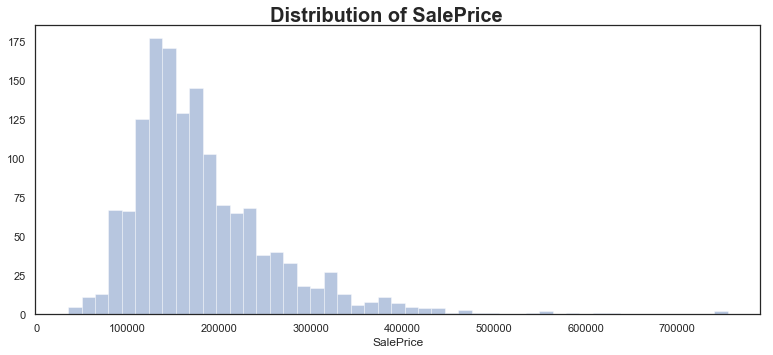

In [11]:
plt.figure(figsize=(13,5))
g = sns.distplot(df_initial_train['SalePrice'], kde=False)
g.figure.subplots_adjust(top=0.93)
g.figure.suptitle('Distribution of SalePrice', fontsize=20, fontweight='bold')

Text(0.5,0.98,'Mean SalePrice by month sold')

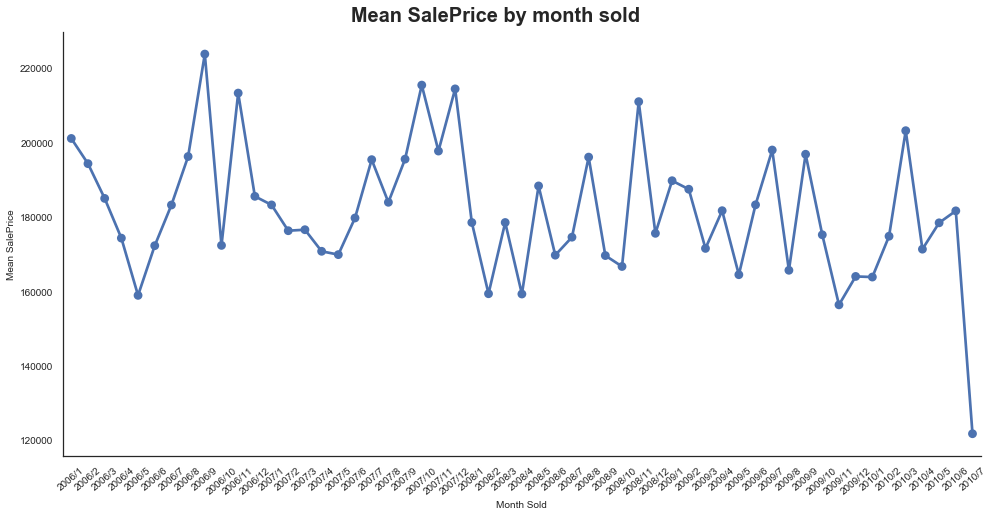

In [12]:
average_price = df_initial_train.groupby(
    ['YrSold', 'MoSold'], as_index=False)['SalePrice'].mean()
average_price['YearMonth'] = average_price.apply(
    lambda x: str(int(x[0])) + "/" + str(int(x[1])), axis=1)
g = sns.catplot(
    x='YearMonth',
    y='SalePrice',
    data=average_price,
    legend=False,
    height=7,
    aspect=2,
    ci=1,
    kind='point')
g.ax.tick_params(axis='both', which='major', labelsize=10)
g.set_xlabels(label='Month Sold', fontsize=10)
g.set_ylabels(label='Mean SalePrice', fontsize=10)
g.set_xticklabels(rotation=40)
g.fig.subplots_adjust(top=0.93)
g.fig.suptitle('Mean SalePrice by month sold', fontsize=20, fontweight='bold')

Text(0.5,0.98,'Total units sold by month')

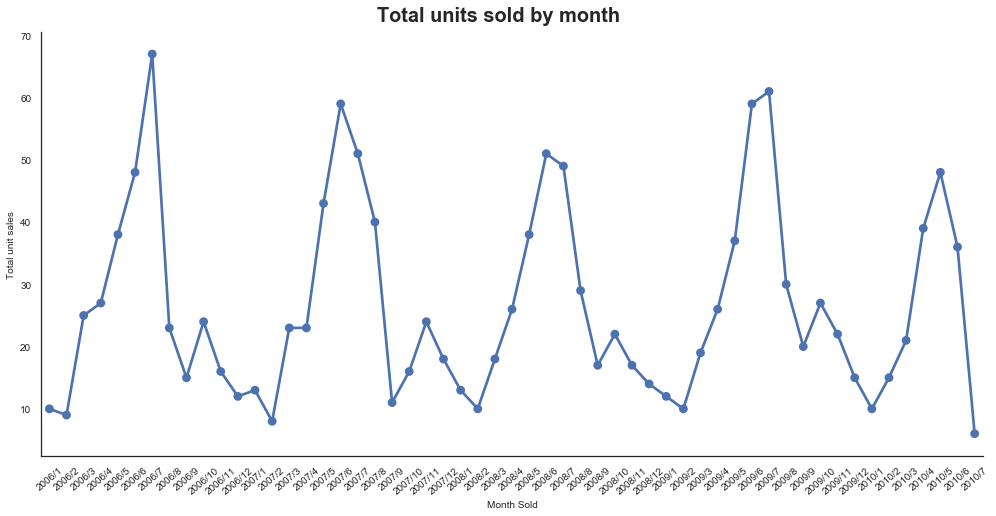

In [13]:
average_sales = df_initial_train.groupby(
    ['YrSold', 'MoSold'], as_index=False)['SalePrice'].count()
average_sales['YearMonth'] = average_price.apply(
    lambda x: str(int(x[0])) + "/" + str(int(x[1])), axis=1)
g = sns.catplot(
    x='YearMonth',
    y='SalePrice',
    data=average_sales,
    legend=False,
    height=7,
    aspect=2,
    ci=1,
    kind='point')
g.ax.tick_params(axis='both', which='major', labelsize=10)
g.set_xlabels(label='Month Sold', fontsize=10)
g.set_ylabels(label='Total unit sales', fontsize=10)
g.set_xticklabels(rotation=40)
g.fig.subplots_adjust(top=0.93)
g.fig.suptitle('Total units sold by month', fontsize=20, fontweight='bold')

Text(0.5,0.98,'Boxplot of sale price vs overall quality score')

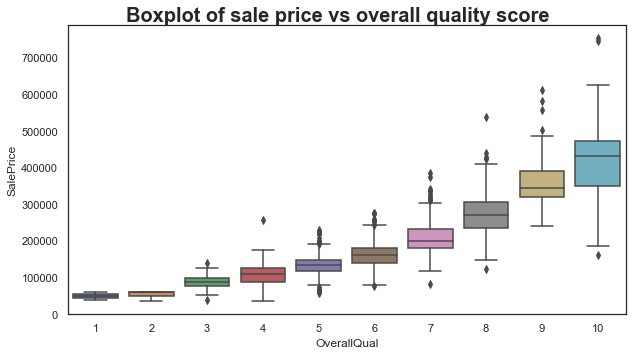

In [14]:
# box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_initial_train['SalePrice'], df_initial_train[var]], axis=1)
plt.figure(figsize=(10,5))
g = sns.boxplot(x=var, y="SalePrice", data=data)
g.figure.subplots_adjust(top=0.93)
g.figure.suptitle('Boxplot of sale price vs overall quality score', fontsize=20, fontweight='bold')

Text(0.5,0.98,'Boxplot of sale price vs neighborhood')

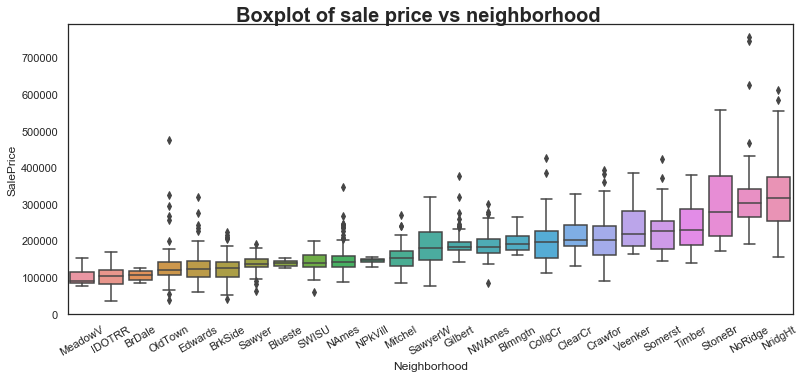

In [15]:
# box plot Neighborhood/saleprice
var = 'Neighborhood'
data = df_initial_train[['SalePrice',var]]
order = data.groupby('Neighborhood')['SalePrice'].median().sort_values().index
plt.figure(figsize=(13,5))
g = sns.boxplot(x=var, y="SalePrice", data=data, order=order)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
g.figure.subplots_adjust(top=0.93)
g.figure.suptitle('Boxplot of sale price vs neighborhood', fontsize=20, fontweight='bold')

Text(0.5,0.98,'Boxplot of sale price vs TotalHouseBsmtSF')

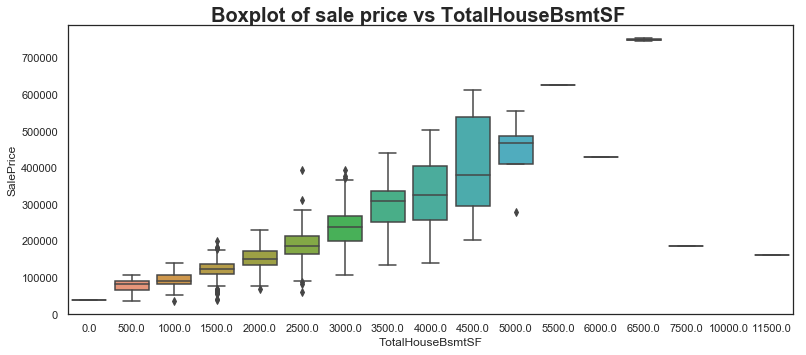

In [16]:
# box plot Total house + basement SF/saleprice
var = 'TotalHouseBsmtSF'
data = pd.concat([df_train['SalePrice'], (df_train[var]//500)*500], axis=1)
plt.figure(figsize=(13,5))
g = sns.boxplot(x=var, y="SalePrice", data=data)
g.figure.subplots_adjust(top=0.93)
g.figure.suptitle('Boxplot of sale price vs TotalHouseBsmtSF', fontsize=20, fontweight='bold')

Text(0.5,0.98,'Scatter plot of sale price vs sale condition')

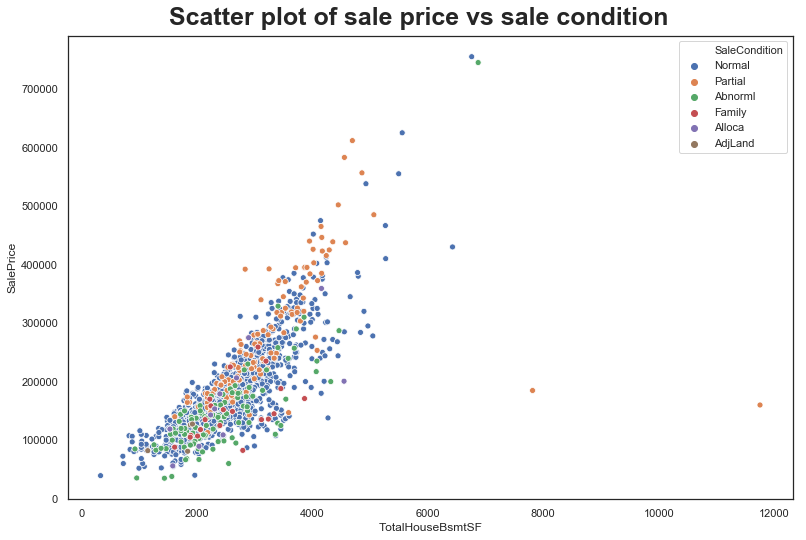

In [17]:
# scatter plot TotalHouseBsmtSF/saleprice
var = 'TotalHouseBsmtSF'
hue = 'SaleCondition'
data = pd.concat([df_train['SalePrice'], df_train[var], df_train[hue]], axis=1)
SaleConditionCat = data.SaleCondition.value_counts().index
data['SaleConditionCat'] = pd.Categorical(data['SaleCondition'],SaleConditionCat, True)
data.sort_values(by='SaleConditionCat', inplace=True)
plt.figure(figsize=(13,8))
g = sns.scatterplot(x=var, y="SalePrice", data=data, hue=hue,hue_order=data.SaleCondition.value_counts().index)
g.figure.subplots_adjust(top=0.93)
g.figure.suptitle('Scatter plot of sale price vs sale condition', fontsize=25, fontweight='bold')